# Count the number of stars in an image

The class `Sky` also has a function to generate desired number of stars in a image. It places random RGB values on random pixels in an image. The purpose of this was to have an image which would work as a test bench for the counter function. 

The count function goes through each pixel of an image and takes the average value of 3 channels (RGB). The pixel values range from 0 to 255. If the average value is greater than the threshold then count is increased else we move on to next pixel. The count function also creates a list of coordinates which have pixel values higher than the threshold. Later we add a circle around those pixel to denote which pixels have higher value than the threshold.


In [187]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

class Sky():
    def __init__(self,x_scale,y_scale,color_channel=3):
        self.x_scale = x_scale
        self.y_scale = y_scale
        self.color_channel = color_channel
        
        self.sky = np.random.randint(0,1,(self.x_scale,self.y_scale,self.color_channel)) # creates a blank image / dark sky

    # function to generate stars
    def generate_stars(self,count):
        for j in range(count):
            position_x = np.random.randint(0,self.sky.shape[0]) # random positions
            position_y = np.random.randint(0,self.sky.shape[1])
            for i in range(self.color_channel):
                # at these coordinates put values for each channel.
                # normal distribution around 190
                self.sky[position_x,position_y,i] = np.random.normal(loc=190,scale=10)

    
    # to illuminate the neighboring pixels to make the image more realistic
    # TO BE DONE
    def illuminate_neighbor_pixels(self):
        pass


    # the count function
    def count_star(self,threshold,marker=True):
        count = 0
        circle = [] # to store the coordinates
        for i in range(self.x_scale):
            for j in range(self.y_scale):
                av = (self.sky[i,j,0] + self.sky[i,j,1] + self.sky[i,j,2])/3  # get average pixel value
                if av>=threshold:
                    if marker==True:
                        circle.append(plt.Circle((j,i),2.0,fill = False, color = 'yellow')) # add circle around the star
                    count+=1
                else:
                    continue
        #print(count)
        fig,ax = plt.subplots(figsize=(10,10))
        ax.imshow(self.sky)
        ax.invert_yaxis()
        if marker==True:
            for i in range(len(circle)):
                ax.add_patch(circle[i]) # add circles around all the stars
        ax.set_title(f"{count} stars above pixel threshold {threshold}")
        plt.show()
        
        
    # plot function
    def plot(self):
        fig,ax = plt.subplots(figsize=(10,10))
        ax.imshow(self.sky)
        ax.invert_yaxis()
        plt.show()

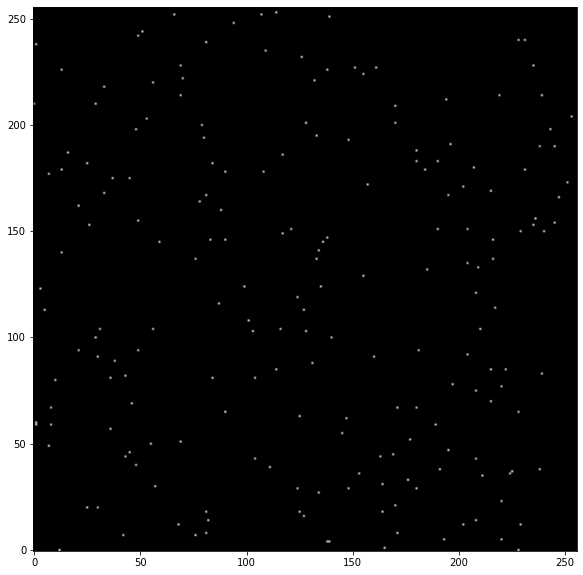

In [188]:
sky = Sky(256,256)
sky.generate_stars(200)
sky.plot()

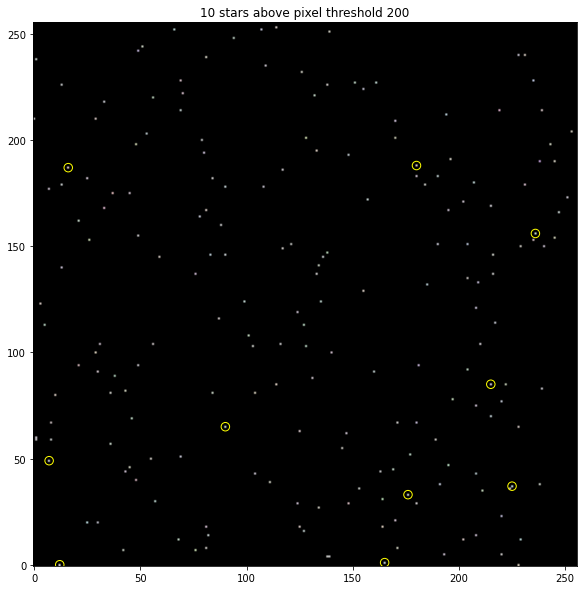

In [196]:
sky.count_star(200)

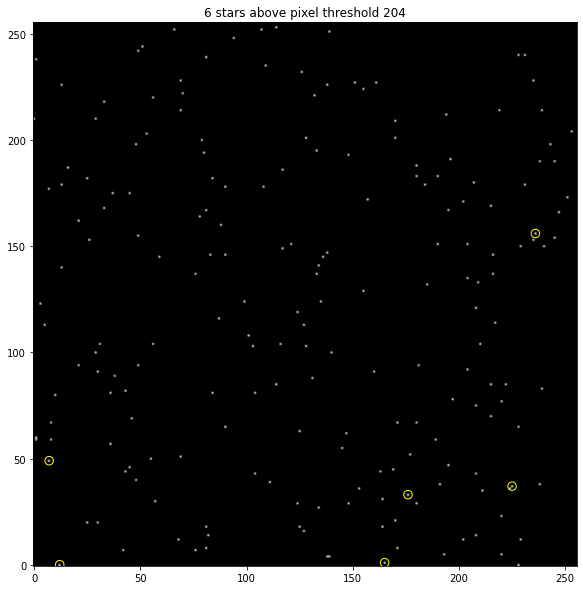

In [197]:
# using clear output to notice the changes with increasing threshold

for i in range(185,205):
    sky.count_star(i)
    clear_output(wait=True)
    time.sleep(1)